In [6]:
import pandas as pd
from IPython.display import Image

path = ""
img_path = ""

In [5]:
df = pd.read_csv(path + 'preprocessed_data.csv')
df.head(3)

,사망인명피해수,분기구분,화재발생일자,화재발생시,현장소방서거리,현장안전센터거리,현장소방지역대거리,발화요인대분류명,시설장소중분류명,방화관리대상여부,...,시간단위풍속,시간단위풍향,시간단위습도,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh)
0,0,1,20170102,11,3.0,1.0,0.0,전기적 요인,단독주택,N,...,2.3,230.0,82.0,294,1551,127.089946,37.583679,57.37625,3519.916667,3519.916667
1,0,1,20170102,12,5.0,2.0,0.0,부주의,음식점,Y,...,2.1,230.0,70.0,409,275,127.027563,37.499615,57.37625,41868.750000,41868.750000
2,0,1,20170102,14,5.0,4.0,0.0,부주의,음식점,N,...,3.1,200.0,59.0,331,113,127.016532,37.514922,57.37625,6635.750000,6635.750000


In [4]:
df.drop(['시간단위습도'], axis=1, inplace=True)

In [5]:
df.drop(['분기구분', '화재발생일자', '현장소방서거리', '현장소방지역대거리', '발화요인대분류명', '시설장소중분류명', '방화관리대상여부', '시간단위풍향'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24369 entries, 0 to 24368
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   사망인명피해수     24369 non-null  int64  
 1   화재발생시       24369 non-null  int64  
 2   현장안전센터거리    24369 non-null  float64
 3   시간단위기온      24369 non-null  float64
 4   시간단위풍속      24369 non-null  float64
 5   시간단위가시거리    24369 non-null  int64  
 6   재산피해액       24369 non-null  int64  
 7   lon         24369 non-null  float64
 8   lat         24369 non-null  float64
 9   실효습도        24369 non-null  float64
 10  가스사용량(KWh)  24369 non-null  float64
 11  전기사용량(KWh)  24369 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 2.2 MB


In [6]:
cls = []

for i in range(df.shape[0]):
    if df['화재발생시'][i] <=5 :
        cls.append('새벽')
    elif df['화재발생시'][i] <= 17:
        cls.append('주간')
    elif df['화재발생시'][i] <= 21:
        cls.append('저녁')
    else:
        cls.append('밤')

df['화재발생시각'] = cls
df = df.drop(['화재발생시'], axis=1)

## 사망인명피해수
- 피해가 일어난 건물과 일어나지 않은 건물로 이진분류를 진행

In [7]:
cls = []

for i in range(df.shape[0]):
    if df['사망인명피해수'][i] == 0:
        cls.append(0)
    else:
        cls.append(1)
        
df['타깃'] = cls
df = df.drop(['사망인명피해수'], axis=1)
df

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각,타깃
0,1.0,6.3,2.3,294,1551,127.089946,37.583679,57.376250,3519.916667,3519.916667,주간,0
1,2.0,7.6,2.1,409,275,127.027563,37.499615,57.376250,41868.750000,41868.750000,주간,0
2,4.0,9.2,3.1,331,113,127.016532,37.514922,57.376250,6635.750000,6635.750000,주간,0
3,2.0,8.3,3.6,305,51,127.083044,37.647071,57.376250,457670.916667,457670.916667,주간,0
4,4.0,6.4,2.1,221,100,127.077849,37.534442,57.376250,4711.583333,4711.583333,저녁,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24364,2.3,1.7,1.7,1404,113,126.948889,37.482005,52.885305,20237.500000,20237.500000,주간,0
24365,1.2,-0.8,1.4,1171,231,127.085319,37.503992,52.885305,14469.333333,14469.333333,저녁,0
24366,1.0,-0.8,1.4,1171,5352,127.129703,37.542661,52.885305,1892.000000,1892.000000,저녁,0
24367,1.2,-1.0,0.9,1134,258,126.921296,37.552125,52.885305,9634.000000,9634.000000,저녁,0


In [8]:
df['가스사용량(KWh)'].describe()

count     24369.000000
mean      26703.690077
std       63124.679915
min      -21065.000000
25%        2404.583333
50%        5190.600000
75%       14834.166667
max      457670.916667
Name: 가스사용량(KWh), dtype: float64

In [9]:
df.drop(df[df['가스사용량(KWh)'] <= 0].index, axis=0, inplace=True)

In [10]:
df[df['전기사용량(KWh)'] <= 0]

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,재산피해액,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각,타깃


In [11]:
df['가스사용량(KWh)'].describe()

count     24358.000000
mean      26716.925791
std       63135.722548
min           1.000000
25%        2406.958333
50%        5193.750000
75%       14846.125000
max      457670.916667
Name: 가스사용량(KWh), dtype: float64

In [12]:
y_peo = df['타깃']
y_mon = df['재산피해액']

df.drop(['타깃', '재산피해액'], axis=1, inplace=True)

In [13]:
y_mon.describe()

count     24358.000000
mean       3072.270548
std       19472.339158
min           0.000000
25%          33.000000
50%         139.000000
75%         699.000000
max      980712.000000
Name: 재산피해액, dtype: float64

In [14]:
y_mon[y_mon >= 700000]

800      980712
11896    782053
20195    862341
Name: 재산피해액, dtype: int64

In [15]:
# 이상치 제거
df = df.drop([800, 11896, 20195], axis=0)
y_mon = y_mon.drop([800, 11896, 20195], axis=0)
y_peo = y_peo.drop([800, 11896, 20195], axis=0)

In [16]:
X = pd.get_dummies(data=df, columns=['화재발생시각'], drop_first=True)

In [17]:
X['화재발생시각_새벽'] = X['화재발생시각_새벽']*1
X['화재발생시각_주간'] = X['화재발생시각_주간']*1
X['화재발생시각_저녁'] = X['화재발생시각_저녁']*1

In [18]:
lon = X['lon']
lat = X['lat']
X.drop(['lon', 'lat'], axis=1, inplace=True)

In [19]:
X.head()

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각_새벽,화재발생시각_저녁,화재발생시각_주간
0,1.0,6.3,2.3,294,57.37625,3519.916667,3519.916667,0,0,1
1,2.0,7.6,2.1,409,57.37625,41868.750000,41868.750000,0,0,1
2,4.0,9.2,3.1,331,57.37625,6635.750000,6635.750000,0,0,1
3,2.0,8.3,3.6,305,57.37625,457670.916667,457670.916667,0,0,1
4,4.0,6.4,2.1,221,57.37625,4711.583333,4711.583333,0,1,0


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_peo, test_size=0.2, random_state=42, stratify=y_peo)

In [21]:
X_train

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각_새벽,화재발생시각_저녁,화재발생시각_주간
11616,1.0,27.1,2.1,733,62.540589,2056.166667,2056.166667,0,1,0
11742,1.0,27.2,0.8,1996,67.068210,5184.000000,5184.000000,1,0,0
11604,1.0,26.6,1.4,824,58.018764,6839.083333,6839.083333,0,0,1
11980,1.0,29.8,2.5,1580,52.667265,19651.166667,19651.166667,0,0,1
10674,2.0,22.4,3.5,1940,29.429769,5831.833333,5831.833333,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1589,1.0,14.8,1.1,2000,47.594907,3576.833333,3576.833333,0,0,1
22805,1.0,22.0,1.4,990,72.318759,2210.166667,2210.166667,1,0,0
2,4.0,9.2,3.1,331,57.376250,6635.750000,6635.750000,0,0,1
16834,2.0,8.7,2.0,1865,41.531397,2600.250000,2600.250000,0,0,1


In [22]:
X.columns[:7]

Index(['현장안전센터거리', '시간단위기온', '시간단위풍속', '시간단위가시거리', '실효습도', '가스사용량(KWh)',
       '전기사용량(KWh)'],
      dtype='object')

In [23]:
from sklearn.preprocessing import StandardScaler, RobustScaler
import numpy as np

for i in X.columns[:7]:
    scaler = RobustScaler()
    X_train[i] = scaler.fit_transform(np.array(X_train[i]).reshape(-1, 1))
    X_test[i] = scaler.transform(np.array(X_test[i]).reshape(-1, 1))
    X[i] = scaler.transform(np.array(X[i]).reshape(-1, 1))

In [24]:
X_train

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각_새벽,화재발생시각_저녁,화재발생시각_주간
11616,-0.4,0.605128,-0.0625,-1.368910,0.894535,-0.255363,-0.255363,0,1,0
11742,-0.4,0.610256,-0.8750,0.096288,1.217058,-0.001985,-0.001985,1,0,0
11604,-0.4,0.579487,-0.5000,-1.263341,0.572426,0.132090,0.132090,0,0,1
11980,-0.4,0.743590,0.1875,-0.386311,0.191216,1.169967,1.169967,0,0,1
10674,0.6,0.364103,0.8125,0.031323,-1.464093,0.050495,0.050495,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1589,-0.4,-0.025641,-0.6875,0.100928,-0.170111,-0.132178,-0.132178,0,0,1
22805,-0.4,0.343590,-0.5000,-1.070766,1.591077,-0.242888,-0.242888,1,0,0
2,2.6,-0.312821,0.5625,-1.835267,0.526657,0.115618,0.115618,0,0,1
16834,0.6,-0.338462,-0.1250,-0.055684,-0.602041,-0.211288,-0.211288,0,0,1


In [25]:
X['가스사용량(KWh)']

0        -0.136788
1         2.969762
2         0.115618
3        36.652938
4        -0.040254
           ...    
24364     1.217465
24365     0.750199
24366    -0.268662
24367     0.358500
24368    -0.262519
Name: 가스사용량(KWh), Length: 24355, dtype: float64

In [26]:
import statsmodels.api as sm

model = sm.Logit(y_train, X_train)

# 뉴턴 메소드는 선형근사법이다. 로지스틱의 최적값을 피팅하는데 어려움이 있어 이와같은 방법을 사용 
results = model.fit(method='newton')
predicted_y = results.predict(X_test)
 
# 회귀 결과물
results.summary()

Optimization terminated successfully.
         Current function value: 0.223251
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     타깃   No. Observations:                19484
Model:                          Logit   Df Residuals:                    19474
Method:                           MLE   Df Model:                            9
Date:                Mon, 06 Nov 2023   Pseudo R-squ.:                 -0.1989
Time:                        16:20:29   Log-Likelihood:                -4349.8
converged:                       True   LL-Null:                       -3628.2
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
현장안전센터거리      -0.1501      0.035     -4.323      0.000      -0.218      -0.082
시간단위기온         0.1644      0.056      2.945      0.003       0.055       0.274
시간단위풍속         0.0921      0.041      2.221      0.026       0.011       0.173
시간단위가시거리       0.5530      0.049     11.348      0.000       0.458       0.649
실효습도          -0.1893      0.047     -4.070      0.000      -0.280      -0.098
가스사용량(KWh)    -0.0263    6.8e+05  -3.87e-08      1.000   -1.33e+06    1.33e+06
전기사용량(KWh)    -0.0263    6.8e+05  -3.87e-08      1.000   -1.33e+06    1.33e+06
화재발생시각_새벽     -2.3421      0.076    -30.996      0.000      -2.490      -2.194
화재발생시각_저녁     -3.0584      0.086    -35.625      0.000      -3.227      -2.890
화재발생시각_주간     -2.8234      0.051    -55.264      0.000      -2.924      -2.723
==============================================================================
"""

In [27]:
df['가스사용량(KWh)']

0          3519.916667
1         41868.750000
2          6635.750000
3        457670.916667
4          4711.583333
             ...      
24364     20237.500000
24365     14469.333333
24366      1892.000000
24367      9634.000000
24368      1967.833333
Name: 가스사용량(KWh), Length: 24355, dtype: float64

In [28]:
y_pred = predicted_y.apply(lambda x : 1 if x >= 0.5 else 0)

In [29]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.9388215972079655

In [30]:
prob = results.predict(X)

In [31]:
df

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각
0,1.0,6.3,2.3,294,127.089946,37.583679,57.376250,3519.916667,3519.916667,주간
1,2.0,7.6,2.1,409,127.027563,37.499615,57.376250,41868.750000,41868.750000,주간
2,4.0,9.2,3.1,331,127.016532,37.514922,57.376250,6635.750000,6635.750000,주간
3,2.0,8.3,3.6,305,127.083044,37.647071,57.376250,457670.916667,457670.916667,주간
4,4.0,6.4,2.1,221,127.077849,37.534442,57.376250,4711.583333,4711.583333,저녁
...,...,...,...,...,...,...,...,...,...,...
24364,2.3,1.7,1.7,1404,126.948889,37.482005,52.885305,20237.500000,20237.500000,주간
24365,1.2,-0.8,1.4,1171,127.085319,37.503992,52.885305,14469.333333,14469.333333,저녁
24366,1.0,-0.8,1.4,1171,127.129703,37.542661,52.885305,1892.000000,1892.000000,저녁
24367,1.2,-1.0,0.9,1134,126.921296,37.552125,52.885305,9634.000000,9634.000000,저녁


In [32]:
df

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각
0,1.0,6.3,2.3,294,127.089946,37.583679,57.376250,3519.916667,3519.916667,주간
1,2.0,7.6,2.1,409,127.027563,37.499615,57.376250,41868.750000,41868.750000,주간
2,4.0,9.2,3.1,331,127.016532,37.514922,57.376250,6635.750000,6635.750000,주간
3,2.0,8.3,3.6,305,127.083044,37.647071,57.376250,457670.916667,457670.916667,주간
4,4.0,6.4,2.1,221,127.077849,37.534442,57.376250,4711.583333,4711.583333,저녁
...,...,...,...,...,...,...,...,...,...,...
24364,2.3,1.7,1.7,1404,126.948889,37.482005,52.885305,20237.500000,20237.500000,주간
24365,1.2,-0.8,1.4,1171,127.085319,37.503992,52.885305,14469.333333,14469.333333,저녁
24366,1.0,-0.8,1.4,1171,127.129703,37.542661,52.885305,1892.000000,1892.000000,저녁
24367,1.2,-1.0,0.9,1134,126.921296,37.552125,52.885305,9634.000000,9634.000000,저녁


In [33]:
df['인명피해확률'] = prob

## 재산피해액
- 다중선형회귀분석을 이용하여 재산피해액을 예측한다.

In [34]:
y_mon

0        1551
1         275
2         113
3          51
4         100
         ... 
24364     113
24365     231
24366    5352
24367     258
24368    1802
Name: 재산피해액, Length: 24355, dtype: int64

In [35]:
import numpy as np

y_mon = np.log1p(y_mon)

In [36]:
X

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각_새벽,화재발생시각_저녁,화재발생시각_주간
0,-0.4,-0.461538,0.0625,-1.878190,0.526657,-0.136788,-0.136788,0,0,1
1,0.6,-0.394872,-0.0625,-1.744780,0.526657,2.969762,2.969762,0,0,1
2,2.6,-0.312821,0.5625,-1.835267,0.526657,0.115618,0.115618,0,0,1
3,0.6,-0.358974,0.8750,-1.865429,0.526657,36.652938,36.652938,0,0,1
4,2.6,-0.456410,-0.0625,-1.962877,0.526657,-0.040254,-0.040254,0,1,0
...,...,...,...,...,...,...,...,...,...,...
24364,0.9,-0.697436,-0.3125,-0.590487,0.206747,1.217465,1.217465,0,0,1
24365,-0.2,-0.825641,-0.5000,-0.860789,0.206747,0.750199,0.750199,0,1,0
24366,-0.4,-0.825641,-0.5000,-0.860789,0.206747,-0.268662,-0.268662,0,1,0
24367,-0.2,-0.835897,-0.8125,-0.903712,0.206747,0.358500,0.358500,0,1,0


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_mon, test_size=0.2, random_state=42)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [39]:
import statsmodels.api as sm

lr = sm.OLS(y_train, X_train)
results = lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  재산피해액   R-squared (uncentered):                   0.784
Model:                            OLS   Adj. R-squared (uncentered):              0.784
Method:                 Least Squares   F-statistic:                              7058.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):                        0.00
Time:                        16:20:47   Log-Likelihood:                         -46586.
No. Observations:               19484   AIC:                                  9.319e+04
Df Residuals:                   19474   BIC:                                  9.327e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
현장안전센터거리       0.1536      0.022      7.138      0.000       0.111       0.196
시간단위기온        -0.5020      0.037    -13.703      0.000      -0.574      -0.430
시간단위풍속        -0.0583      0.027     -2.164      0.031      -0.111      -0.005
시간단위가시거리      -0.3464      0.029    -11.913      0.000      -0.403      -0.289
실효습도           0.1373      0.030      4.569      0.000       0.078       0.196
가스사용량(KWh) -1.958e+11   7.42e+11     -0.264      0.792   -1.65e+12    1.26e+12
전기사용량(KWh)  1.958e+11   7.42e+11      0.264      0.792   -1.26e+12    1.65e+12
화재발생시각_새벽      4.9859      0.049    101.416      0.000       4.890       5.082
화재발생시각_저녁      4.7796      0.044    108.741      0.000       4.693       4.866
화재발생시각_주간      5.0570      0.030    168.094      0.000       4.998       5.116
==============================================================================
Omnibus:                     1048.248   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1230.773
Skew:                           0.587   Prob(JB):                    5.51e-268
Kurtosis:                       3.369   Cond. No.                     4.21e+14
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 6.35e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
y_pred = results.predict(X_test)
mean_absolute_error(y_pred, y_test)

2.061908609419815

In [41]:
df['회귀예측'] = results.predict(X)

In [42]:
df

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각,인명피해확률,회귀예측
0,1.0,6.3,2.3,294,127.089946,37.583679,57.376250,3519.916667,3519.916667,주간,0.018622,5.942505
1,2.0,7.6,2.1,409,127.027563,37.499615,57.376250,41868.750000,41868.750000,주간,0.014700,6.114373
2,4.0,9.2,3.1,331,127.016532,37.514922,57.376250,6635.750000,6635.750000,주간,0.012947,6.292056
3,2.0,8.3,3.6,305,127.083044,37.647071,57.376250,457670.916667,457670.916667,주간,0.002588,7.065866
4,4.0,6.4,2.1,221,127.077849,37.534442,57.376250,4711.583333,4711.583333,저녁,0.008903,6.162803
...,...,...,...,...,...,...,...,...,...,...,...,...
24364,2.3,1.7,1.7,1404,126.948889,37.482005,52.885305,20237.500000,20237.500000,주간,0.028424,5.832065
24365,1.2,-0.8,1.4,1171,127.085319,37.503992,52.885305,14469.333333,14469.333333,저녁,0.022647,5.540933
24366,1.0,-0.8,1.4,1171,127.129703,37.542661,52.885305,1892.000000,1892.000000,저녁,0.024576,5.480490
24367,1.2,-1.0,0.9,1134,126.921296,37.552125,52.885305,9634.000000,9634.000000,저녁,0.021916,5.567749


## 화재피해지수 산출 방법론

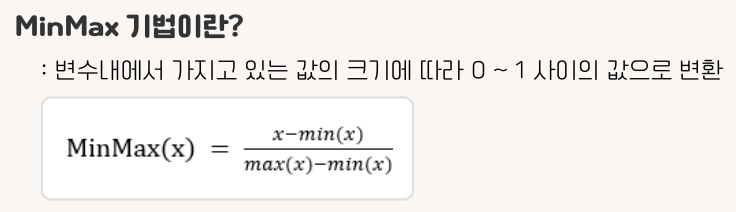

In [8]:
Image(filename = img_path +'MinMaxScaler.png')

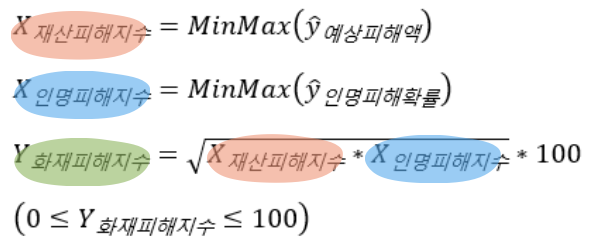

In [9]:
Image(filename = img_path +'화재피해지수_산식.png')

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()
df['회귀예측'] = scaler.fit_transform(np.array(df['회귀예측']).reshape(-1, 1))*100

In [45]:
scaler = MinMaxScaler()
df['인명피해확률'] = scaler.fit_transform(np.array(df['인명피해확률']).reshape(-1, 1))*100

In [46]:
df

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각,인명피해확률,회귀예측
0,1.0,6.3,2.3,294,127.089946,37.583679,57.376250,3519.916667,3519.916667,주간,2.747923,82.725525
1,2.0,7.6,2.1,409,127.027563,37.499615,57.376250,41868.750000,41868.750000,주간,2.105026,84.904017
2,4.0,9.2,3.1,331,127.016532,37.514922,57.376250,6635.750000,6635.750000,주간,1.817727,87.156210
3,2.0,8.3,3.6,305,127.083044,37.647071,57.376250,457670.916667,457670.916667,주간,0.120060,96.964542
4,4.0,6.4,2.1,221,127.077849,37.534442,57.376250,4711.583333,4711.583333,저녁,1.155019,85.517882
...,...,...,...,...,...,...,...,...,...,...,...,...
24364,2.3,1.7,1.7,1404,126.948889,37.482005,52.885305,20237.500000,20237.500000,주간,4.354363,81.325650
24365,1.2,-0.8,1.4,1171,127.085319,37.503992,52.885305,14469.333333,14469.333333,저녁,3.407635,77.635447
24366,1.0,-0.8,1.4,1171,127.129703,37.542661,52.885305,1892.000000,1892.000000,저녁,3.723698,76.869314
24367,1.2,-1.0,0.9,1134,126.921296,37.552125,52.885305,9634.000000,9634.000000,저녁,3.287761,77.975350


In [47]:
df['인명피해확률'].describe()

count    24355.000000
mean        12.423485
std         17.813237
min          0.000000
25%          4.972551
50%          7.504122
75%         10.147939
max        100.000000
Name: 인명피해확률, dtype: float64

In [48]:
df['지수'] = np.sqrt(df['회귀예측']*df['인명피해확률'])
df

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각,인명피해확률,회귀예측,지수
0,1.0,6.3,2.3,294,127.089946,37.583679,57.376250,3519.916667,3519.916667,주간,2.747923,82.725525,15.077247
1,2.0,7.6,2.1,409,127.027563,37.499615,57.376250,41868.750000,41868.750000,주간,2.105026,84.904017,13.368814
2,4.0,9.2,3.1,331,127.016532,37.514922,57.376250,6635.750000,6635.750000,주간,1.817727,87.156210,12.586748
3,2.0,8.3,3.6,305,127.083044,37.647071,57.376250,457670.916667,457670.916667,주간,0.120060,96.964542,3.411968
4,4.0,6.4,2.1,221,127.077849,37.534442,57.376250,4711.583333,4711.583333,저녁,1.155019,85.517882,9.938548
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24364,2.3,1.7,1.7,1404,126.948889,37.482005,52.885305,20237.500000,20237.500000,주간,4.354363,81.325650,18.818113
24365,1.2,-0.8,1.4,1171,127.085319,37.503992,52.885305,14469.333333,14469.333333,저녁,3.407635,77.635447,16.265095
24366,1.0,-0.8,1.4,1171,127.129703,37.542661,52.885305,1892.000000,1892.000000,저녁,3.723698,76.869314,16.918572
24367,1.2,-1.0,0.9,1134,126.921296,37.552125,52.885305,9634.000000,9634.000000,저녁,3.287761,77.975350,16.011381


In [49]:
df['지수'].describe()

count    24355.000000
mean        22.660805
std          5.157521
min          0.000000
25%         19.261008
50%         22.977059
75%         26.045868
max         38.135532
Name: 지수, dtype: float64

In [50]:
df

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각,인명피해확률,회귀예측,지수
0,1.0,6.3,2.3,294,127.089946,37.583679,57.376250,3519.916667,3519.916667,주간,2.747923,82.725525,15.077247
1,2.0,7.6,2.1,409,127.027563,37.499615,57.376250,41868.750000,41868.750000,주간,2.105026,84.904017,13.368814
2,4.0,9.2,3.1,331,127.016532,37.514922,57.376250,6635.750000,6635.750000,주간,1.817727,87.156210,12.586748
3,2.0,8.3,3.6,305,127.083044,37.647071,57.376250,457670.916667,457670.916667,주간,0.120060,96.964542,3.411968
4,4.0,6.4,2.1,221,127.077849,37.534442,57.376250,4711.583333,4711.583333,저녁,1.155019,85.517882,9.938548
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24364,2.3,1.7,1.7,1404,126.948889,37.482005,52.885305,20237.500000,20237.500000,주간,4.354363,81.325650,18.818113
24365,1.2,-0.8,1.4,1171,127.085319,37.503992,52.885305,14469.333333,14469.333333,저녁,3.407635,77.635447,16.265095
24366,1.0,-0.8,1.4,1171,127.129703,37.542661,52.885305,1892.000000,1892.000000,저녁,3.723698,76.869314,16.918572
24367,1.2,-1.0,0.9,1134,126.921296,37.552125,52.885305,9634.000000,9634.000000,저녁,3.287761,77.975350,16.011381


In [51]:
cls = []

for i in range(df.shape[0]):
    if df['지수'].iloc[i] >= 66:
        cls.append('1등급')
    elif df['지수'].iloc[i] >= 33:
        cls.append('2등급')
    else:
        cls.append('3등급')
        
df['등급'] = cls

In [52]:
df['등급'].value_counts()

2등급    17214
3등급     7071
1등급       70
Name: 등급, dtype: int64

In [53]:
df['lat'] = lat
df['lon'] = lon
df

,현장안전센터거리,시간단위기온,시간단위풍속,시간단위가시거리,lon,lat,실효습도,가스사용량(KWh),전기사용량(KWh),화재발생시각,인명피해확률,회귀예측,지수,등급
0,1.0,6.3,2.3,294,127.089946,37.583679,57.376250,3519.916667,3519.916667,주간,2.747923,82.725525,15.077247,3등급
1,2.0,7.6,2.1,409,127.027563,37.499615,57.376250,41868.750000,41868.750000,주간,2.105026,84.904017,13.368814,3등급
2,4.0,9.2,3.1,331,127.016532,37.514922,57.376250,6635.750000,6635.750000,주간,1.817727,87.156210,12.586748,3등급
3,2.0,8.3,3.6,305,127.083044,37.647071,57.376250,457670.916667,457670.916667,주간,0.120060,96.964542,3.411968,3등급
4,4.0,6.4,2.1,221,127.077849,37.534442,57.376250,4711.583333,4711.583333,저녁,1.155019,85.517882,9.938548,3등급
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24364,2.3,1.7,1.7,1404,126.948889,37.482005,52.885305,20237.500000,20237.500000,주간,4.354363,81.325650,18.818113,3등급
24365,1.2,-0.8,1.4,1171,127.085319,37.503992,52.885305,14469.333333,14469.333333,저녁,3.407635,77.635447,16.265095,3등급
24366,1.0,-0.8,1.4,1171,127.129703,37.542661,52.885305,1892.000000,1892.000000,저녁,3.723698,76.869314,16.918572,3등급
24367,1.2,-1.0,0.9,1134,126.921296,37.552125,52.885305,9634.000000,9634.000000,저녁,3.287761,77.975350,16.011381,3등급


In [54]:
df.to_csv(path + 'final_data.csv', index=False, encoding='utf-8-sig')